In [66]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

def labelizza(df, df2):
    df["label"] = df2["label"]
    return

def indicizza(df):
    df["indice"] = [i for i in range(len(df))]
    return 

from tensorflow.keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [68]:
df1 = pd.read_fwf(r"body_acc_x_train.txt", header=None)
df1_test = pd.read_fwf(r"body_acc_x_test.txt", header=None)

In [3]:
# df2 = pd.read_fwf(r"body_acc_y_train.txt", header=None)
# df3 = pd.read_fwf(r"body_acc_z_train.txt", header=None)
df4 = pd.read_fwf(r"body_gyro_x_train.txt", header=None)
df4_test = pd.read_fwf(r"body_gyro_x_test.txt", header=None)
# df5 = pd.read_fwf(r"body_gyro_y_train.txt", header=None)
# df6 = pd.read_fwf(r"body_gyro_z_train.txt", header=None)
# df7 = pd.read_fwf(r"total_acc_x_train.txt", header=None)
# df8 = pd.read_fwf(r"total_acc_y_train.txt", header=None)
# df9 = pd.read_fwf(r"total_acc_z_train.txt", header=None)

In [69]:
dfytrain = pd.read_fwf(r"C:\Users\daddu\OneDrive\Desktop\MAGISTRALE\Data Mining\DM2\UCI HAR Dataset\train\y_train.txt", header=None)
dfytrain.rename({0: 'label'}, axis=1, inplace=True)

dfytest = pd.read_fwf(r"C:\Users\daddu\OneDrive\Desktop\MAGISTRALE\Data Mining\DM2\UCI HAR Dataset\train\y_test.txt", header=None)
dfytest.rename({0: 'label'}, axis=1, inplace=True)

NameError: name 'df2' is not defined

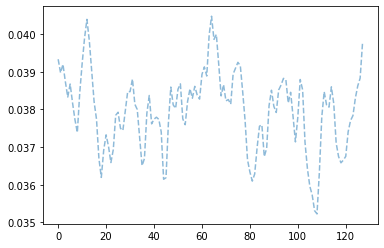

In [5]:
plt.plot(df1.var(), ls = "--", alpha = 0.5)
plt.plot(df2.var(), ls = "--", alpha = 0.5)
plt.plot(df3.var(), ls = "--", alpha = 0.5)
plt.plot(df4.var())
plt.plot(df5.var(), ls = "--", alpha = 0.5)
plt.plot(df6.var(), ls = "--", alpha = 0.5)
plt.plot(df7.var(), ls = "--", alpha = 0.5)
plt.plot(df8.var(), ls = "--", alpha = 0.5)
plt.plot(df9.var(), ls = "--", alpha = 0.5)
plt.legend(["df"+str(i) for i in range(1,10)])
plt.xlabel("Time Stamps", fontsize= 12)
plt.ylabel("Variance", fontsize= 12)
plt.show()

In [70]:
# l = [df1,df2,df3,df4,df5,df6,df7,df8,df9]
# for i in range(len(l)):
#     indicizza(l[i])
# for i in range(len(l)):
#     labelizza(l[i], dfytrain)

labelizza(df1_test,dfytest)
labelizza(df1,dfytrain)

# for i in range(len(l)):
#     plt.plot(l[i].var())
#     plt.show()

df1_test

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,0.011653,0.013109,0.011269,0.027831,0.002318,-0.018965,-0.061920,-0.094248,-0.079534,-0.070084,...,-0.001247,0.002848,0.002355,0.002721,0.003255,0.001301,0.001292,0.001470,0.002574,5
1,0.009280,0.004930,0.003954,0.009214,0.016156,0.014079,0.013105,0.021247,0.026823,0.031054,...,0.000163,-0.001095,-0.004547,-0.005310,-0.004094,0.002200,0.007788,0.003433,-0.001239,5
2,0.005732,0.007066,0.005110,0.002434,0.002024,0.001382,0.001930,0.004875,0.003776,0.002400,...,-0.003586,-0.003860,-0.003560,-0.000974,0.001052,0.000778,-0.000743,-0.001923,-0.004305,5
3,0.000452,0.000604,-0.002485,-0.004562,-0.006002,-0.006382,-0.005276,-0.001489,0.005153,0.004951,...,0.000978,0.002248,0.003530,-0.000117,-0.003275,-0.001325,0.000597,-0.000246,-0.000269,5
4,-0.004362,-0.002765,-0.004905,-0.004682,-0.000267,0.004135,0.005626,0.000933,-0.001542,0.003020,...,0.004918,0.003647,0.002481,0.004855,0.006754,0.004633,0.002157,-0.000869,-0.001329,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.107662,0.124079,0.183420,0.289247,0.393799,0.446456,0.436931,0.363053,0.279962,0.152701,...,-0.230325,-0.120717,-0.097928,-0.154805,-0.084908,-0.131883,-0.145651,-0.154956,-0.201542,2
2943,-0.042392,-0.017244,0.015269,0.064482,0.086802,0.084482,0.101578,0.130484,0.208370,0.310620,...,0.561624,0.523547,0.366543,0.109336,-0.280305,-0.250735,0.049391,0.012861,0.035633,2
2944,-0.147647,-0.169903,-0.168698,-0.138600,-0.144781,-0.072979,-0.040348,-0.023016,-0.025176,-0.074406,...,0.147866,0.168442,0.211400,0.328852,0.537643,0.638592,0.497893,0.214127,-0.114509,2
2945,0.071227,-0.088665,-0.070675,-0.116887,-0.214117,-0.219928,-0.275024,-0.229062,-0.245309,-0.242260,...,-0.083458,-0.085439,-0.100470,-0.067287,0.018514,0.097981,0.185988,0.273711,0.353674,2


In [108]:
attributes = [col for col in df4.columns if col != 'label']

X_train = df1[attributes].values
y_train = np.array(df1['label'])

X_test = df1_test[attributes].values
y_test = np.array(df1_test['label'])

# Data Normalization

In [117]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.preprocessing import TimeSeriesScalerMeanVariance


#scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
scaler = TimeSeriesScalerMinMax()
X_train = scaler.fit_transform(X_train).reshape(X_train.shape[0], X_train.shape[1])
X_test = scaler.fit_transform(X_test).reshape(X_test.shape[0], X_test.shape[1])

# KNN

In [118]:
from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier(p=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6192738378011537
F1-score [0.8403526  0.73271414 0.81575604 0.34623656 0.45814167 0.56363636]
              precision    recall  f1-score   support

           1       0.82      0.86      0.84       496
           2       0.71      0.75      0.73       471
           3       0.87      0.76      0.82       420
           4       0.37      0.33      0.35       491
           5       0.45      0.47      0.46       532
           6       0.55      0.58      0.56       537

    accuracy                           0.62      2947
   macro avg       0.63      0.63      0.63      2947
weighted avg       0.62      0.62      0.62      2947



In [113]:
# from tslearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(p=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6230064472344757
F1-score [0.84765625 0.7523511  0.8427673  0.32688172 0.47296059 0.54147675]
              precision    recall  f1-score   support

           1       0.82      0.88      0.85       496
           2       0.74      0.76      0.75       471
           3       0.89      0.80      0.84       420
           4       0.35      0.31      0.33       491
           5       0.46      0.48      0.47       532
           6       0.53      0.55      0.54       537

    accuracy                           0.62      2947
   macro avg       0.63      0.63      0.63      2947
weighted avg       0.62      0.62      0.62      2947



In [102]:
from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier(metric = "dtw_itakura")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5985748218527316
F1-score [0.81988743 0.7016129  0.76251605 0.35194942 0.43897824 0.53853473]
              precision    recall  f1-score   support

           1       0.77      0.88      0.82       496
           2       0.67      0.74      0.70       471
           3       0.83      0.71      0.76       420
           4       0.36      0.34      0.35       491
           5       0.44      0.44      0.44       532
           6       0.55      0.53      0.54       537

    accuracy                           0.60      2947
   macro avg       0.60      0.61      0.60      2947
weighted avg       0.59      0.60      0.59      2947



In [154]:
from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier(metric = "dtw_fast")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [156]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_leaf=10,min_samples_split=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.42551747539871054
F1-score [0.46153846 0.42167256 0.56641054 0.31231814 0.35992579 0.45117187]
              precision    recall  f1-score   support

           1       0.46      0.47      0.46       496
           2       0.47      0.38      0.42       471
           3       0.53      0.61      0.57       420
           4       0.30      0.33      0.31       491
           5       0.36      0.36      0.36       532
           6       0.47      0.43      0.45       537

    accuracy                           0.43      2947
   macro avg       0.43      0.43      0.43      2947
weighted avg       0.43      0.43      0.43      2947



In [17]:
from pyts.transformation import ShapeletTransform
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
from sklearn.tree import DecisionTreeClassifier
from pyts.classification import KNeighborsClassifier

# CNN 

In [121]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization

In [160]:
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(Activation('relu'))
    
    model.add(Dropout(0.2))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(Activation('relu'))
    
    model.add(Dropout(0.2))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Activation('relu'))
    
    model.add(Dropout(0.2))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(7, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [161]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  128
N. LABELS:  6


In [162]:
cnn = build_simple_cnn(n_timesteps, n_outputs)

In [163]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 121, 16)           144       
                                                                 
 activation_15 (Activation)  (None, 121, 16)           0         
                                                                 
 dropout_15 (Dropout)        (None, 121, 16)           0         
                                                                 
 conv1d_16 (Conv1D)          (None, 117, 32)           2592      
                                                                 
 activation_16 (Activation)  (None, 117, 32)           0         
                                                                 
 dropout_16 (Dropout)        (None, 117, 32)           0         
                                                                 
 conv1d_17 (Conv1D)          (None, 115, 64)          

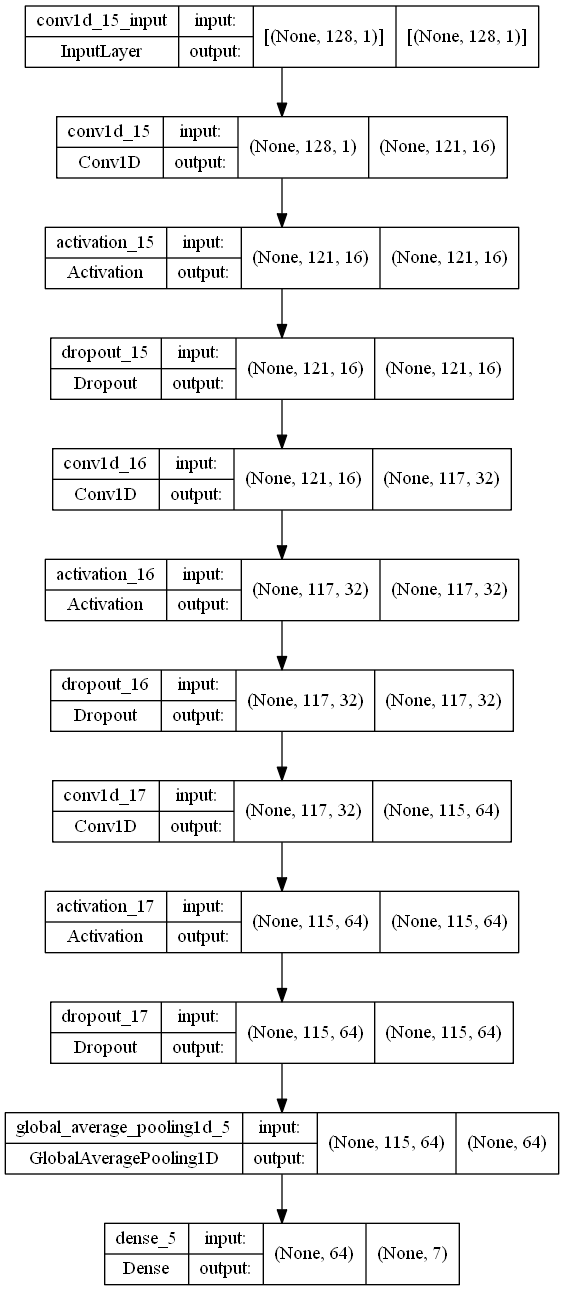

In [164]:
from keras.utils.vis_utils import plot_model
plot_model(cnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [168]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 32
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

In [169]:
history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=100, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Epoch 1/100
184/184 [==============================] - 3s 18ms/step - loss: 0.5612 - accuracy: 0.7361 - val_loss: 0.5681 - val_accuracy: 0.7376 - lr: 0.0010
Epoch 2/100
184/184 [==============================] - 3s 18ms/step - loss: 0.5652 - accuracy: 0.7308 - val_loss: 0.6078 - val_accuracy: 0.7084 - lr: 0.0010
Epoch 3/100
184/184 [==============================] - 4s 20ms/step - loss: 0.5571 - accuracy: 0.7405 - val_loss: 0.5696 - val_accuracy: 0.7335 - lr: 0.0010
Epoch 4/100
184/184 [==============================] - 3s 18ms/step - loss: 0.5630 - accuracy: 0.7330 - val_loss: 0.5625 - val_accuracy: 0.7349 - lr: 0.0010
Epoch 5/100
184/184 [==============================] - 3s 18ms/step - loss: 0.5604 - accuracy: 0.7337 - val_loss: 0.5681 - val_accuracy: 0.7220 - lr: 0.0010
Epoch 6/100
184/184 [==============================] - 3s 18ms/step - loss: 0.5609 - accuracy: 0.7339 - val_loss: 0.5681 - val_accuracy: 0.7328 - lr: 0.0010
Epoch 7/100
184/184 [==============================] - 3s 

Epoch 53/100
184/184 [==============================] - 4s 21ms/step - loss: 0.5468 - accuracy: 0.7439 - val_loss: 0.5920 - val_accuracy: 0.7138 - lr: 0.0010
Epoch 54/100
184/184 [==============================] - 4s 21ms/step - loss: 0.5469 - accuracy: 0.7402 - val_loss: 0.5609 - val_accuracy: 0.7349 - lr: 0.0010
Epoch 55/100
184/184 [==============================] - 4s 21ms/step - loss: 0.5474 - accuracy: 0.7363 - val_loss: 0.5590 - val_accuracy: 0.7335 - lr: 0.0010
Epoch 56/100
184/184 [==============================] - 4s 20ms/step - loss: 0.5443 - accuracy: 0.7456 - val_loss: 0.5561 - val_accuracy: 0.7396 - lr: 0.0010
Epoch 57/100
184/184 [==============================] - 4s 19ms/step - loss: 0.5476 - accuracy: 0.7424 - val_loss: 0.5522 - val_accuracy: 0.7437 - lr: 0.0010
Epoch 58/100
184/184 [==============================] - 4s 20ms/step - loss: 0.5532 - accuracy: 0.7395 - val_loss: 0.5575 - val_accuracy: 0.7492 - lr: 0.0010
Epoch 59/100
184/184 [==============================

In [170]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7081778079402783
F1-score [0.88252149 0.86191537 0.98431846 0.43625498 0.50919118 0.64980545]
              precision    recall  f1-score   support

           1       0.84      0.93      0.88       496
           2       0.91      0.82      0.86       471
           3       1.00      0.97      0.98       420
           4       0.43      0.45      0.44       491
           5       0.50      0.52      0.51       532
           6       0.68      0.62      0.65       537

    accuracy                           0.71      2947
   macro avg       0.72      0.72      0.72      2947
weighted avg       0.71      0.71      0.71      2947



# Learning-based Approach

In [44]:
X_train = TimeSeriesScalerMinMax().fit_transform(X_train)

In [46]:
# n_ts, ts_sz = X_train.shape
# n_classes = len(set(y_train))

# # Set the number of shapelets per size as done in the original paper
# shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
#                                                        ts_sz=ts_sz,
#                                                        n_classes=n_classes,
#                                                        l=0.1,
#                                                        r=1)

# print('n_ts', n_ts)
# print('ts_sz', ts_sz)
# print('n_classes', n_classes)
# print('shapelet_sizes', shapelet_sizes)

ValueError: too many values to unpack (expected 2)

In [58]:
from tslearn.shapelets import LearningShapelets
from tensorflow.keras.optimizers import Adam

n_ts, ts_sz = X_train.shape[:2]
n_classes = len(set(y_train))

shapelet_sizes = {12: 6}

shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                            weight_regularizer=0.001,
                            optimizer=Adam(lr=0.01),
                            max_iter=100,
                            verbose=1,
                            random_state=42)
shp_clf.fit(X_train, y_train)

C:\Users\daddu\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\daddu\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/100
29/29 [==============================] - 1s 9ms/step - loss: 1.7805 - categorical_accuracy: 0.2169 - categorical_crossentropy: 1.7747
Epoch 2/100
29/29 [==============================] - 0s 10ms/step - loss: 1.7451 - categorical_accuracy: 0.2715 - categorical_crossentropy: 1.7388
Epoch 3/100
29/29 [==============================] - 0s 9ms/step - loss: 1.7182 - categorical_accuracy: 0.3077 - categorical_crossentropy: 1.7098
Epoch 4/100
29/29 [==============================] - 0s 9ms/step - loss: 1.6918 - categorical_accuracy: 0.3307 - categorical_crossentropy: 1.6803
Epoch 5/100
29/29 [==============================] - 0s 9ms/step - loss: 1.6683 - categorical_accuracy: 0.3417 - categorical_crossentropy: 1.6527
Epoch 6/100
29/29 [==============================] - 0s 9ms/step - loss: 1.6462 - categorical_accuracy: 0.3505 - categorical_crossentropy: 1.6262
Epoch 7/100
29/29 [==============================] - 0s 9ms/step - loss: 1.6272 - categorical_accuracy: 0.3554 - categorica

29/29 [==============================] - 0s 9ms/step - loss: 1.4837 - categorical_accuracy: 0.4085 - categorical_crossentropy: 1.4374
Epoch 57/100
29/29 [==============================] - 0s 9ms/step - loss: 1.4815 - categorical_accuracy: 0.4067 - categorical_crossentropy: 1.4353
Epoch 58/100
29/29 [==============================] - 0s 9ms/step - loss: 1.4849 - categorical_accuracy: 0.4042 - categorical_crossentropy: 1.4387
Epoch 59/100
29/29 [==============================] - 0s 11ms/step - loss: 1.4892 - categorical_accuracy: 0.4018 - categorical_crossentropy: 1.4430
Epoch 60/100
29/29 [==============================] - 0s 11ms/step - loss: 1.4805 - categorical_accuracy: 0.4082 - categorical_crossentropy: 1.4342
Epoch 61/100
29/29 [==============================] - 0s 9ms/step - loss: 1.4828 - categorical_accuracy: 0.4081 - categorical_crossentropy: 1.4365
Epoch 62/100
29/29 [==============================] - 0s 9ms/step - loss: 1.4846 - categorical_accuracy: 0.4017 - categorical_cro

LearningShapelets(max_iter=100, n_shapelets_per_size={12: 6},
                  optimizer=<keras.optimizer_v2.adam.Adam object at 0x0000019AA92D1FD0>,
                  random_state=42, verbose=1, weight_regularizer=0.001)

In [47]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="adam",
                        weight_regularizer=.01,
                        max_iter=100,
                        verbose=1)

C:\Users\daddu\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


In [48]:
shp_clf.fit(X_train, y_train)

Epoch 1/100
29/29 [==============================] - 1s 8ms/step - loss: 1.8442 - categorical_accuracy: 0.2114 - categorical_crossentropy: 1.7908
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 1.8353 - categorical_accuracy: 0.2004 - categorical_crossentropy: 1.7883
Epoch 3/100
29/29 [==============================] - 0s 8ms/step - loss: 1.8278 - categorical_accuracy: 0.1922 - categorical_crossentropy: 1.7866
Epoch 4/100
29/29 [==============================] - 0s 8ms/step - loss: 1.8215 - categorical_accuracy: 0.1888 - categorical_crossentropy: 1.7853
Epoch 5/100
29/29 [==============================] - 0s 7ms/step - loss: 1.8162 - categorical_accuracy: 0.1891 - categorical_crossentropy: 1.7844
Epoch 6/100
29/29 [==============================] - 0s 7ms/step - loss: 1.8116 - categorical_accuracy: 0.1820 - categorical_crossentropy: 1.7837
Epoch 7/100
29/29 [==============================] - 0s 7ms/step - loss: 1.8076 - categorical_accuracy: 0.1787 - categorical

29/29 [==============================] - 0s 9ms/step - loss: 1.7772 - categorical_accuracy: 0.1914 - categorical_crossentropy: 1.7737
Epoch 57/100
29/29 [==============================] - 0s 8ms/step - loss: 1.7769 - categorical_accuracy: 0.1914 - categorical_crossentropy: 1.7734
Epoch 58/100
29/29 [==============================] - 0s 8ms/step - loss: 1.7767 - categorical_accuracy: 0.1915 - categorical_crossentropy: 1.7731
Epoch 59/100
29/29 [==============================] - 0s 9ms/step - loss: 1.7765 - categorical_accuracy: 0.1914 - categorical_crossentropy: 1.7727
Epoch 60/100
29/29 [==============================] - 0s 10ms/step - loss: 1.7762 - categorical_accuracy: 0.1914 - categorical_crossentropy: 1.7724
Epoch 61/100
29/29 [==============================] - 0s 9ms/step - loss: 1.7760 - categorical_accuracy: 0.1915 - categorical_crossentropy: 1.7721
Epoch 62/100
29/29 [==============================] - 0s 9ms/step - loss: 1.7758 - categorical_accuracy: 0.1923 - categorical_cros

LearningShapelets(max_iter=100, n_shapelets_per_size={12: 6}, optimizer='adam',
                  verbose=1, weight_regularizer=0.01)

In [59]:
y_pred = shp_clf.predict(X_test)

12/12 [==============================] - 0s 8ms/step


In [60]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.19341703427214116
F1-score [0.08695652 0.00809717 0.04166667 0.         0.         0.32435703]
              precision    recall  f1-score   support

           1       0.70      0.05      0.09       496
           2       0.09      0.00      0.01       471
           3       0.75      0.02      0.04       420
           4       0.00      0.00      0.00       491
           5       0.00      0.00      0.00       532
           6       0.19      1.00      0.32       537

    accuracy                           0.19      2947
   macro avg       0.29      0.18      0.08      2947
weighted avg       0.27      0.19      0.08      2947



# Shaplet-distances-based Classifier

In [61]:
X_train2 = shp_clf.transform(X_train)

29/29 [==============================] - 0s 7ms/step


In [62]:
X_train2.shape

(7352, 6)

In [63]:
X_test2 = shp_clf.transform(X_test)

12/12 [==============================] - 0s 7ms/step


In [64]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.20088225313878522
F1-score [0.04990403 0.16640986 0.10917031 0.40230833 0.0242915  0.        ]
              precision    recall  f1-score   support

           1       0.52      0.03      0.05       496
           2       0.30      0.11      0.17       471
           3       0.66      0.06      0.11       420
           4       0.25      0.99      0.40       491
           5       0.03      0.02      0.02       532
           6       0.00      0.00      0.00       537

    accuracy                           0.20      2947
   macro avg       0.29      0.20      0.13      2947
weighted avg       0.28      0.20      0.12      2947



In [65]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.16932473702069903
F1-score [0.08534323 0.20710974 0.06550218 0.03508772 0.3075616  0.03290043]
              precision    recall  f1-score   support

           1       0.53      0.05      0.09       496
           2       0.38      0.14      0.21       471
           3       0.39      0.04      0.07       420
           4       0.05      0.03      0.04       491
           5       0.20      0.68      0.31       532
           6       0.03      0.04      0.03       537

    accuracy                           0.17      2947
   macro avg       0.27      0.16      0.12      2947
weighted avg       0.26      0.17      0.12      2947

